# CONTEO DE COLONIAS BACTERIANAS DESDE UN ENFOQUE MACROSCÓPICO
---

Este notebook contiene el desarrollo de la solución basada en visión artificial que se busca implementar para automatizar el conteo de colonias bacterianas cultivadas en placas de agar.

## 1. Proceso de Adquisición

Inicialmente, se tomaron las siguientes imágenes como muestra del conjunto de imágenes típicas que se usarían como entrada del sistema de visión artificial. Estas imágenes contienen un cultivo de bacterias E.Coli en diferentes etapas de crecimiento y se muestran a continuación:


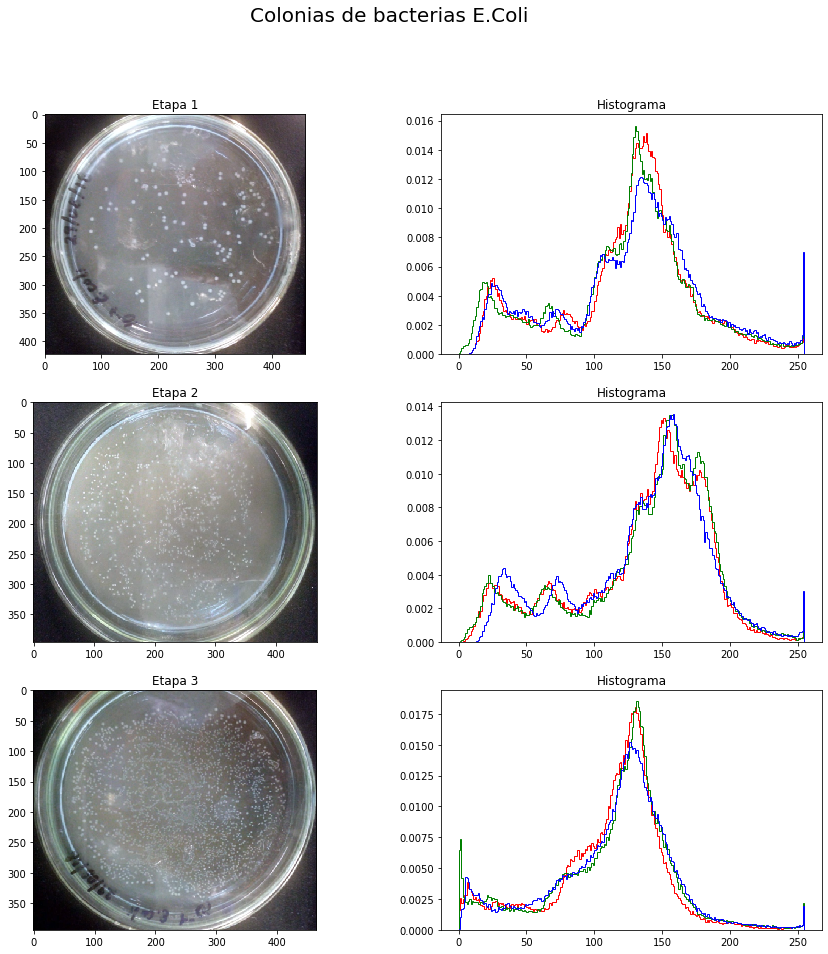

In [44]:
#Importación de librerías
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Lectura de las imágenes a color
img1 = cv2.imread("res/ecoli-1.png", cv2.COLOR_BGR2RGB)
img2 = cv2.imread("res/ecoli-2.png", cv2.COLOR_BGR2RGB)
img3 = cv2.imread("res/ecoli-3.png", cv2.COLOR_BGR2RGB)


#Mostrar imágenes y sus histogramas asociados
colors = ('r','g','b')

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

fig.suptitle('Colonias de bacterias E.Coli', fontsize=20)


arreglo_plots[0,0].set_title('Etapa 1')
arreglo_plots[0,0].imshow(img1, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
for i,col in enumerate(colors):
    img_array_i = img1[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Etapa 2')
arreglo_plots[1,0].imshow(img2, cmap="gray")
arreglo_plots[1,1].set_title('Histograma')
for i,col in enumerate(colors):
    img_array_i = img2[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[2,0].set_title('Etapa 3')
arreglo_plots[2,0].imshow(img3, cmap="gray")
arreglo_plots[2,1].set_title('Histograma')
for i,col in enumerate(colors):
    img_array_i = img3[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])


De los histogramas obtenidos se puede observar que en las tres imágenes se presenta un bajo contraste, y este es más bajo a cuando presentan más bacterias en la placa, ya que tanto el nivel de luminosidad como el de oscuridad bajan a medida que crece la colonia.

A continuación se exploran diferentes canales de color en los espacios RGB y CMY para tener una idea inicial de cuál canal facilitaría el manejo del contraste antes de realizar el pre-procesamiento de la imagen. Se hace el análisis con la imagen número 3, ya que es el caso que  presenta mayor complejidad al momento de realizar el análisis.

*Nota:* Se descartaron los espacios de color YIQ y YUB debido a que la extracción de estos canales generaba una pérdida de información para este caso.

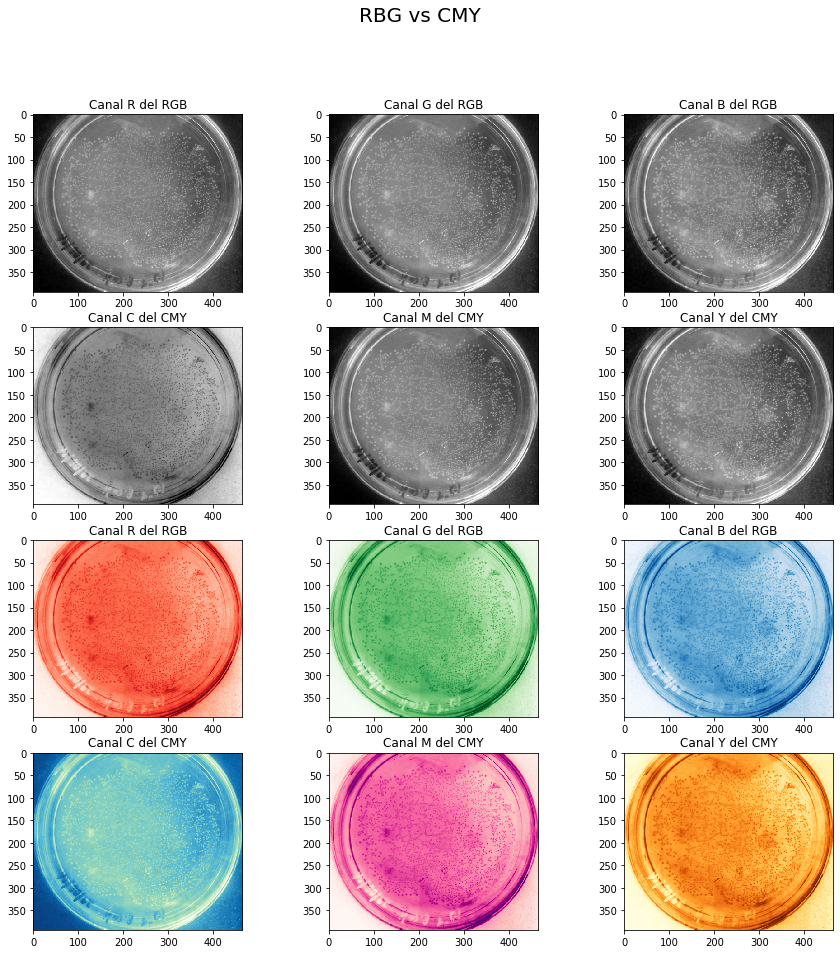

In [45]:
#Aquí se descompone cada canal de la imagen
img_R = img3[:,:,0]
img_G = img3[:,:,1]
img_B = img3[:,:,2]

#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
img_C = 255 - img3[:,:,0]
img_M = 255 - img3[:,:,1]
img_Y = 255 - img3[:,:,2]

#Se crea un subplot de 4x3, para mostrar las imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4,3, figsize=(15, 15))
fig.suptitle('RBG vs CMY', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='gray')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='gray')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='gray')
ax4.set_title('Canal C del CMY')
ax4.imshow(img_C, cmap='gray')
ax5.set_title('Canal M del CMY')
ax5.imshow(img_G, cmap='gray')
ax6.set_title('Canal Y del CMY')
ax6.imshow(img_B, cmap='gray')
ax7.set_title('Canal R del RGB')
ax7.imshow(img_R, cmap='Reds')
ax8.set_title('Canal G del RGB')
ax8.imshow(img_G, cmap='Greens')
ax9.set_title('Canal B del RGB')
ax9.imshow(img_B, cmap='Blues')
ax10.set_title('Canal C del CMY')
ax10.imshow(img_C, cmap='GnBu')
ax11.set_title('Canal M del CMY')
ax11.imshow(img_G, cmap='RdPu')
ax12.set_title('Canal Y del CMY')
ax12.imshow(img_B, cmap='YlOrBr')

Al visulizar los canales en escala de grises, se obtiene un buen contraste al extraer el canal C del espacio CMY, mientras que visualizando los canales a color, el canal R del espacio RGB es el que presenta el contraste más adecuado para realizar  el análisis, por lo que se podría tomar una de estas dos imágenes para iniciar el proceso de pre-procesamiento. 